In [1]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import re
import glob

In [34]:
import matplotlib.pyplot as plt

In [57]:
NAMES

array([[array(['21012_104_CA1_fm.mat'], dtype='<U20'),
        array(['21012_104_SUB_fm.mat'], dtype='<U20')]], dtype=object)

In [35]:
NAMES = loadmat('10/NAMES.mat')['NAMES']
sample_nums_ca = [4, 6, 8, 10, 12, 14, 16]; 
sample_nums_sub = [4, 6, 8, 10, 12, 14, 16, 19];

pts = lambda x,y,id: {'loc':id,'sample_nums':x,'mean': np.mean(y), 'std': np.std(y),'val':y}

In [36]:
def procs(res_name,df_name):
    # Create a case-insensitive regex pattern for the desired file name
    pattern = re.compile(re.escape(df_name) + r'\.mat$', re.IGNORECASE)

    # Use glob to find all .mat files in the directory
    search_pattern = res_name + '/*.mat'
    matched_file = None

    # Find the file that matches the desired name (case-insensitive)
    for file in glob.glob(search_pattern):
        if pattern.search(file):
            matched_file = file
            break

    if matched_file is None:
        raise FileNotFoundError(f"No file matching '{df_name}.mat' found in directory '{res_name}'")

    # Load the .mat file and retrieve the data
    tmp = loadmat(matched_file)[re.split(r'[/.]', matched_file)[1]]
    df=pd.DataFrame()
    
    df=pd.concat([df,pd.DataFrame([pts(sample_nums_ca[i],tmp[0,0][0,i][0],'CA1') for i in range(7)])],ignore_index=True)
    df=pd.concat([df,pd.DataFrame([pts(sample_nums_sub[i],tmp[0,1][0,i][0],'SUB') for i in range(8)])],ignore_index=True)
    
    return df

In [37]:
df_H_IND = procs('10','RESULTS_H_IND_ALL')
df_H_CDM = procs('10','RESULTS_H_CDM_ALL')

df_H_CDM_UP = procs('10','RESULTS_H_CDM_ALL_UP')
df_H_CDM_DOWN = procs('10','RESULTS_H_CDM_ALL_DOWN')

In [49]:
df = pd.DataFrame([],columns=['loc','sample_nums','mean','upL','dwL'])

# For CA1 Neurons
for i in df_H_IND.query('loc=="CA1"')['sample_nums'].values:
    row={
            'loc':'CA1',
             'sample_nums':i,
             'mean': np.mean(df_H_IND.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -  df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]),
             'upL': np.mean(df_H_IND.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -df_H_CDM_UP.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]),
             'dwL': np.mean(df_H_IND.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -df_H_CDM_DOWN.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]),
             
             'Nmean': np.mean((df_H_IND.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -  df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0])      /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0])),
             
             'NupL': np.mean((df_H_IND.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -df_H_CDM_UP.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0])),
             
             'NdwL': np.mean((df_H_IND.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -df_H_CDM_DOWN.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]))
    }
    df=pd.concat([df if not df.empty else None,pd.DataFrame([row])],ignore_index=True)
#For SUB Neurons
for i in df_H_IND.query('loc=="SUB"')['sample_nums'].values:
    row={
            'loc':'SUB',
            'sample_nums':i,
            'mean': np.mean(df_H_IND.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -  df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]),
            'upL': np.mean(df_H_IND.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -df_H_CDM_UP.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]),
            'dwL': np.mean(df_H_IND.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -df_H_CDM_DOWN.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]),
            
            'Nmean': np.mean((df_H_IND.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -  df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0])),
            
            'NupL': np.mean((df_H_IND.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -df_H_CDM_UP.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0])),
            
            'NdwL': np.mean((df_H_IND.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -df_H_CDM_DOWN.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]))
    }
    df=pd.concat([df if not df.empty else None,pd.DataFrame([row])],ignore_index=True)

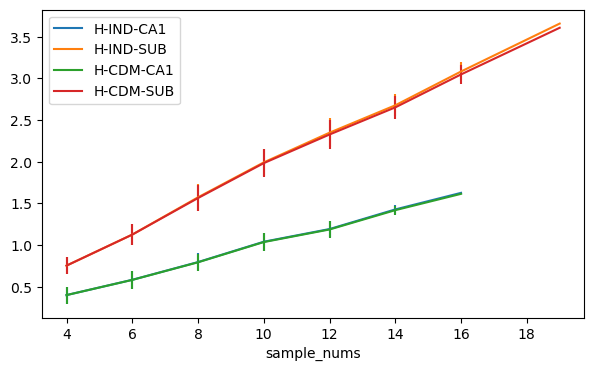

In [50]:
ls = 'dotted'
fig, ax = plt.subplots(figsize=(7, 4))

# # standard error bars
# ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls)
df_H_IND.query('loc=="CA1"').plot(x='sample_nums',y='mean',yerr='std',ax=ax, label='H-IND-CA1')
df_H_IND.query('loc=="SUB"').plot(x='sample_nums',y='mean',yerr='std',ax=ax, label='H-IND-SUB')
df_H_CDM.query('loc=="CA1"').plot(x='sample_nums',y='mean',yerr='std',ax=ax, label='H-CDM-CA1')
df_H_CDM.query('loc=="SUB"').plot(x='sample_nums',y='mean',yerr='std',ax=ax, label='H-CDM-SUB')

plt.show()

(4.0, 20.0)

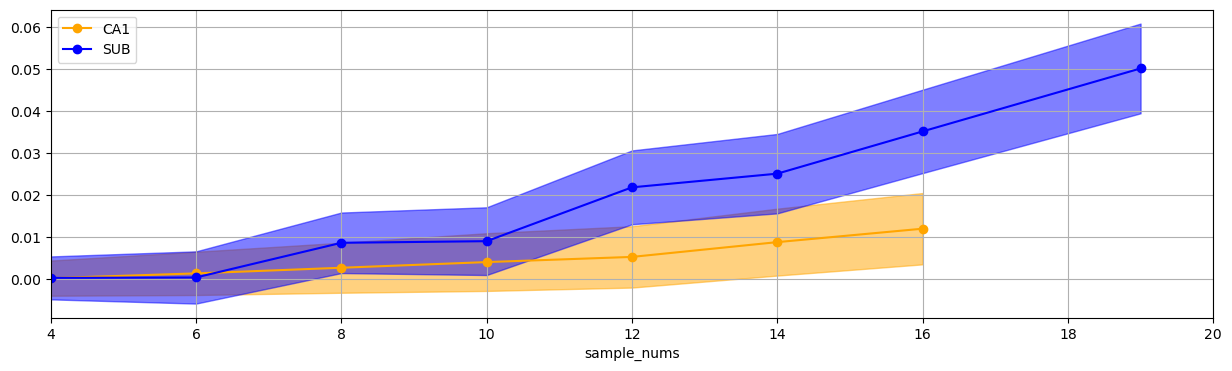

In [55]:
fig, ax = plt.subplots(figsize=(15, 4))

df.query('loc=="CA1"').plot(x='sample_nums',y='mean',ax=ax, label='CA1',marker='o',color="orange")
ax.fill_between(df.query('loc=="CA1"')['sample_nums'], df.query('loc=="CA1"')['upL'], df.query('loc=="CA1"')['dwL'], alpha=0.5,color="orange")
df.query('loc=="SUB"').plot(x='sample_nums',y='mean',ax=ax, label='SUB',marker='o',color="blue")
ax.fill_between(df.query('loc=="SUB"')['sample_nums'], df.query('loc=="SUB"')['upL'], df.query('loc=="SUB"')['dwL'], alpha=0.5,color="blue")
ax.legend(loc='upper left')
ax.grid()
ax.set_xlim(4, 20)

(-0.015, 0.02)

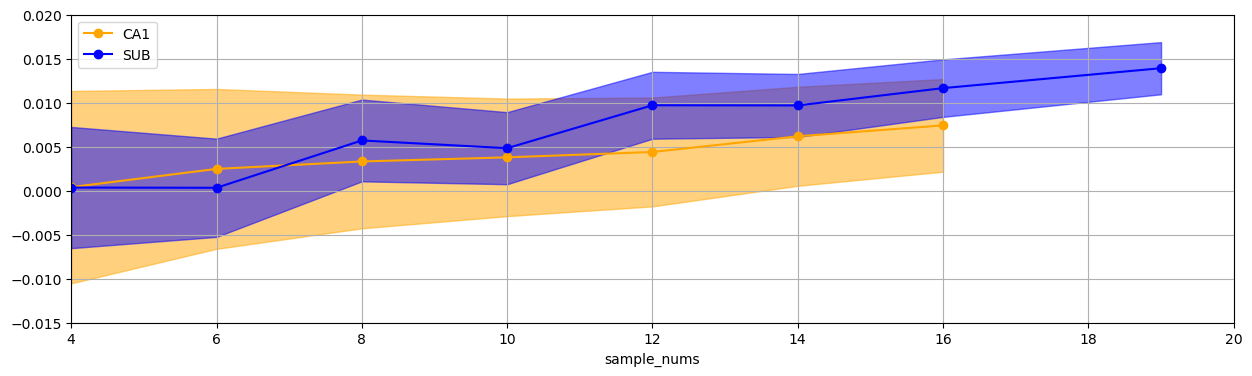

In [56]:
fig, ax = plt.subplots(figsize=(15, 4))

df.query('loc=="CA1"').plot(x='sample_nums',y='Nmean',ax=ax, label='CA1',marker='o',color="orange")
ax.fill_between(df.query('loc=="CA1"')['sample_nums'], df.query('loc=="CA1"')['NupL'], df.query('loc=="CA1"')['NdwL'], alpha=0.5,color="orange")
df.query('loc=="SUB"').plot(x='sample_nums',y='Nmean',ax=ax, label='SUB',marker='o',color="blue")
ax.fill_between(df.query('loc=="SUB"')['sample_nums'], df.query('loc=="SUB"')['NupL'], df.query('loc=="SUB"')['NdwL'], alpha=0.5,color="blue")
ax.legend(loc='upper left')
ax.grid()
ax.set_xlim(4, 20)
ax.set_ylim(-0.015, 0.02)